<a href="https://colab.research.google.com/github/sidharthahuja95/Siddharth-Ahuja_Motion-Recognition-using-IMU-Sensor-Fusion-on-Raspberry-Pi/blob/main/Embedded_Systems_Siddharth_Ahuja_motion_recognition_imu_Lab_Number_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# STEP 1: Unzip data
!unzip -q motion_data.zip

replace motion_data/move_twist/move_twist_1750391662.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace motion_data/move_twist/move_twist_1750391615.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# STEP 2: Import Libraries
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from random import shuffle


In [4]:
# STEP 3: Configuration
expected_length = 300
label_map = {"move_none": 0, "move_circle": 1, "move_shake": 2, "move_twist": 3}
noise_std = 0.01  # Add light Gaussian noise
data_dir = "motion_data"


In [6]:
# STEP 4: Load and Preprocess Data
all_files = []
for label_name in os.listdir(data_dir):
    full_path = os.path.join(data_dir, label_name)
    if os.path.isdir(full_path):
        for file in os.listdir(full_path):
            if file.endswith(".npy"):
                all_files.append((label_name, os.path.join(full_path, file)))

shuffle(all_files)

data = []
labels = []

for label_name, file_path in all_files:
    sample = np.load(file_path).flatten()

    # Pad or truncate to fixed length
    if len(sample) < expected_length:
        sample = np.pad(sample, (0, expected_length - len(sample)), mode='constant')
    else:
        sample = sample[:expected_length]

    # Add random noise for generalization
    sample += np.random.normal(0, noise_std, sample.shape)

    data.append(sample)
    labels.append(label_map[label_name])

# Convert to numpy arrays
X = np.array(data)
y = tf.keras.utils.to_categorical(labels, num_classes=4)

# Normalize input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)

Train shape: (192, 300) (192, 4)
Validation shape: (49, 300) (49, 4)


In [7]:
# STEP 5: Define Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# STEP 6: Define Callback (only checkpoint)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [9]:
# STEP 7: Train the Model (no early stopping)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=4,
    epochs=20,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4197 - loss: 1.6219
Epoch 1: val_loss improved from inf to 0.90795, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4200 - loss: 1.6191 - val_accuracy: 0.7551 - val_loss: 0.9079
Epoch 2/20
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 1.2038
Epoch 2: val_loss improved from 0.90795 to 0.54741, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5889 - loss: 1.1994 - val_accuracy: 0.7959 - val_loss: 0.5474
Epoch 3/20
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.7797
Epoch 3: val_loss improved from 0.54741 to 0.39101, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6782 - loss: 0.7828 - val_accuracy: 0.8776 - val_loss: 0.3910
Epoch 4/20
46/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - loss: 0.7593
Epoch 4: val_loss improved from 0.39101 to 0.33076, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 0.7512 - val_accuracy: 0.9184 - val_loss: 0.3308
Epoch 5/20
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.7520
Epoch 5: val_loss improved from 0.33076 to 0.28615, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 0.7523 - val_accuracy: 0.8980 - val_loss: 0.2862
Epoch 6/20
46/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.6370
Epoch 6: val_loss did not improve from 0.28615
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7537 - loss: 0.6417 - val_accuracy: 0.8776 - val_loss: 0.2902
Epoch 7/20
40/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7407 - loss: 0.7572
Epoch 7: val_loss improved from 0.28615 to 0.23238, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7488 - loss: 0.7328 - val_accuracy: 0.9184 - val_loss: 0.2324
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7612 - loss: 0.5687
Epoch 8: val_loss improved from 0.23238 to 0.22406, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7607 - loss: 0.5707 - val_accuracy: 0.8980 - val_loss: 0.2241
Epoch 9/20
24/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3925 
Epoch 9: val_loss improved from 0.22406 to 0.17242, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.4816 - val_accuracy: 0.9184 - val_loss: 0.1724
Epoch 10/20
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.5123
Epoch 10: val_loss did not improve from 0.17242
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.5115 - val_accuracy: 0.8980 - val_loss: 0.2034
Epoch 11/20
39/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.6422
Epoch 11: val_loss did not improve from 0.17242
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7368 - loss: 0.6115 - val_accuracy: 0.8980 - val_loss: 0.2006
Epoch 12/20
44/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.4885
Epoch 12: val_loss improved from 0.17242 to 0.16253, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.4814 - val_accuracy: 0.9388 - val_loss: 0.1625
Epoch 13/20
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.4611
Epoch 13: val_loss improved from 0.16253 to 0.14199, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8422 - loss: 0.4621 - val_accuracy: 0.9184 - val_loss: 0.1420
Epoch 14/20
46/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4946
Epoch 14: val_loss improved from 0.14199 to 0.10738, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8141 - loss: 0.4972 - val_accuracy: 0.9796 - val_loss: 0.1074
Epoch 15/20
37/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8172 - loss: 0.4947
Epoch 15: val_loss improved from 0.10738 to 0.10494, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8195 - loss: 0.4950 - val_accuracy: 0.9796 - val_loss: 0.1049
Epoch 16/20
40/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8113 - loss: 0.5365
Epoch 16: val_loss improved from 0.10494 to 0.09464, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8046 - loss: 0.5355 - val_accuracy: 0.9796 - val_loss: 0.0946
Epoch 17/20
46/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.6499
Epoch 17: val_loss improved from 0.09464 to 0.07521, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7669 - loss: 0.6382 - val_accuracy: 1.0000 - val_loss: 0.0752
Epoch 18/20
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.4130
Epoch 18: val_loss improved from 0.07521 to 0.06502, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8600 - loss: 0.4150 - val_accuracy: 1.0000 - val_loss: 0.0650
Epoch 19/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.4075
Epoch 19: val_loss did not improve from 0.06502
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8568 - loss: 0.4066 - val_accuracy: 1.0000 - val_loss: 0.0686
Epoch 20/20
46/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8133 - loss: 0.5648
Epoch 20: val_loss did not improve from 0.06502
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8174 - loss: 0.5534 - val_accuracy: 0.9592 - val_loss: 0.0840


In [ ]:
# STEP 8: Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("motion_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted and saved as motion_model.tflite")

Saved artifact at '/tmp/tmpjm8p8xvl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134434557889040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557900560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557894800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557897680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557896912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557893264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557894992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557901904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557894224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557901328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134434557895184: Te

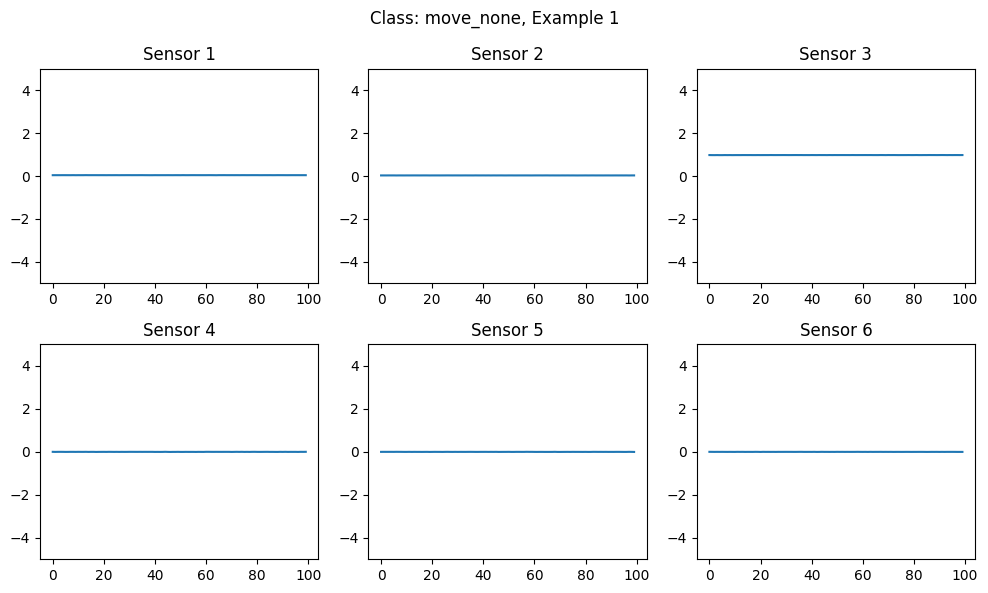

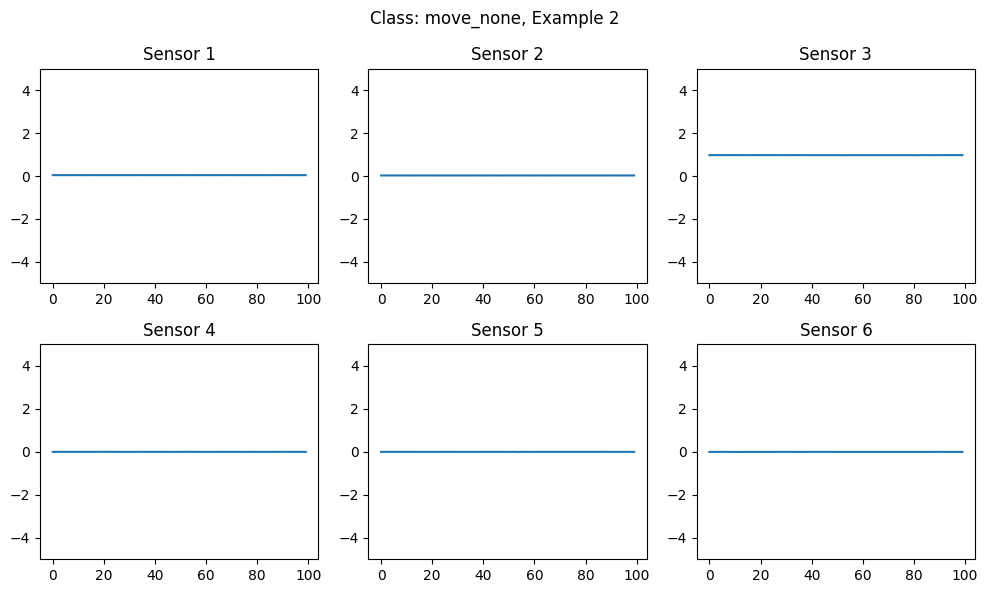

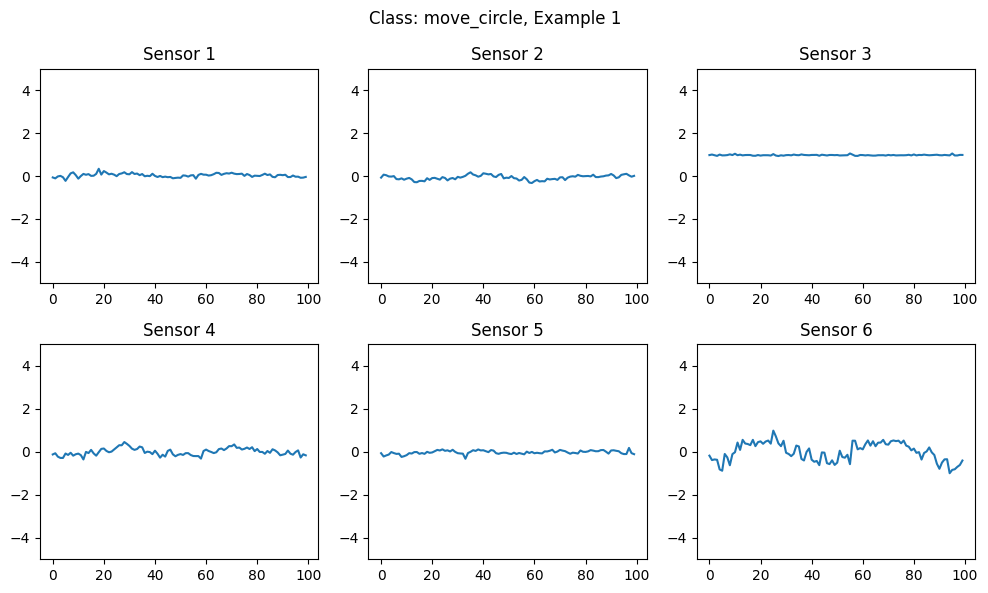

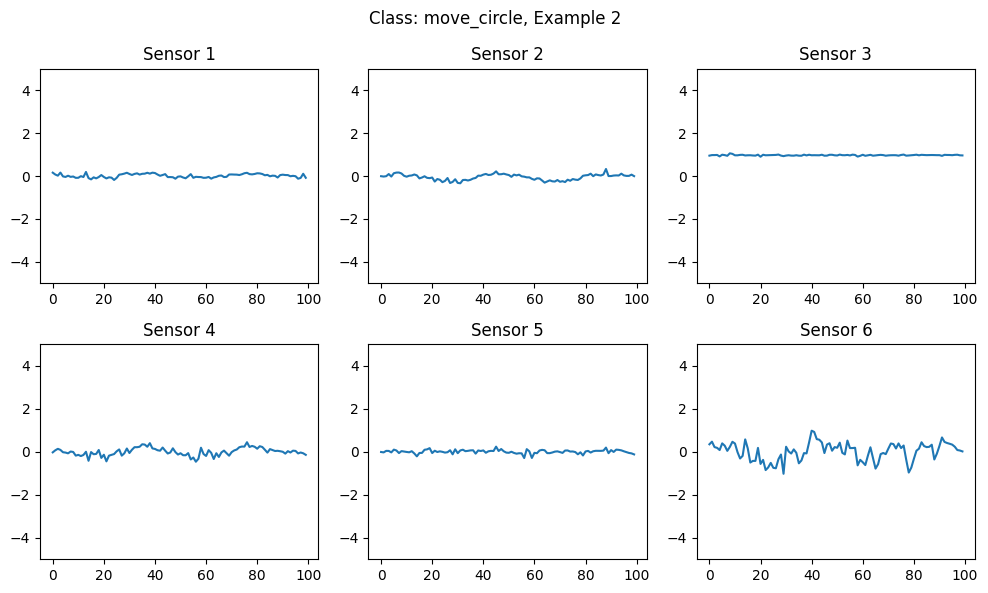

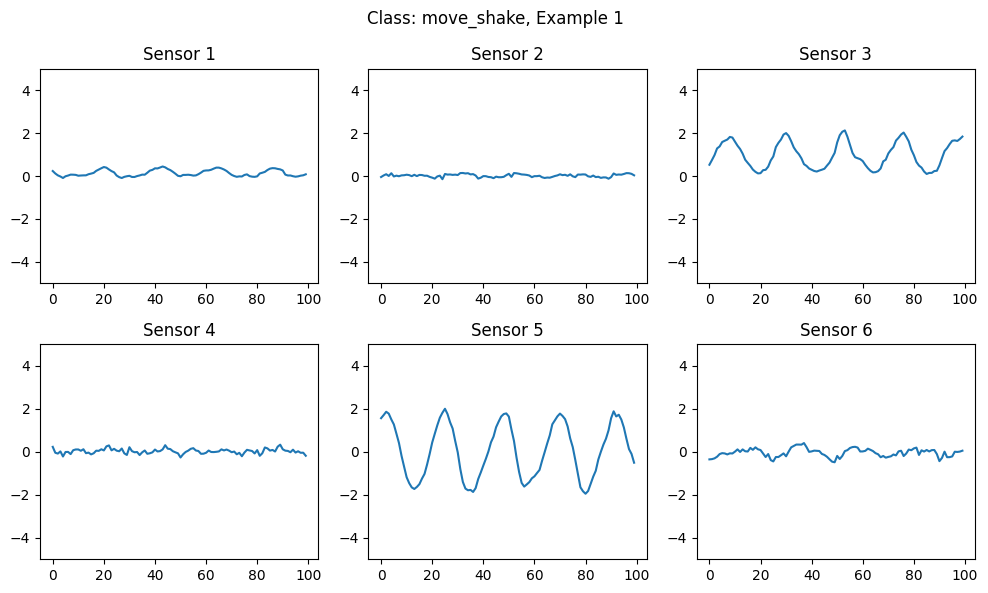

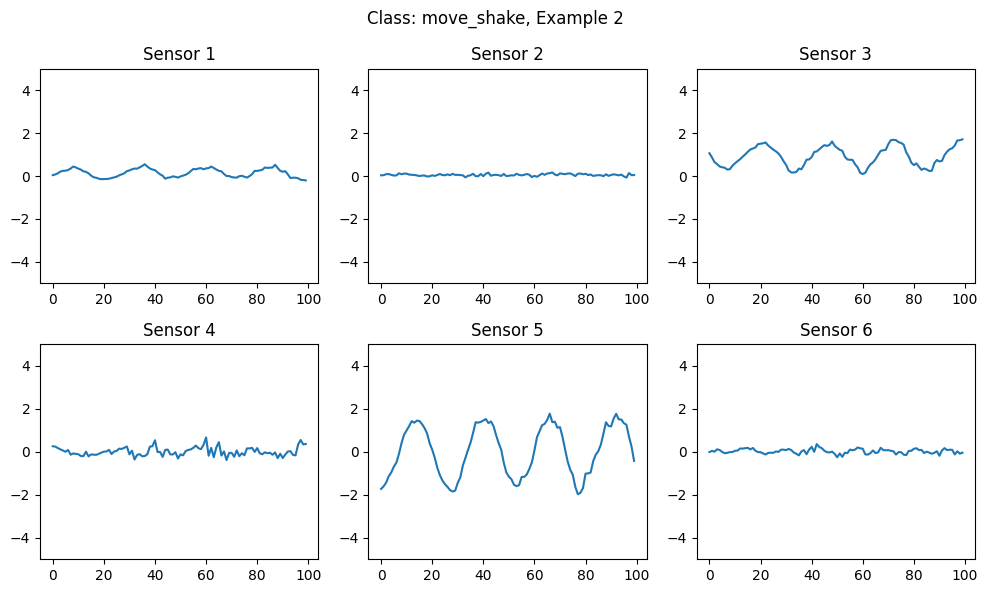

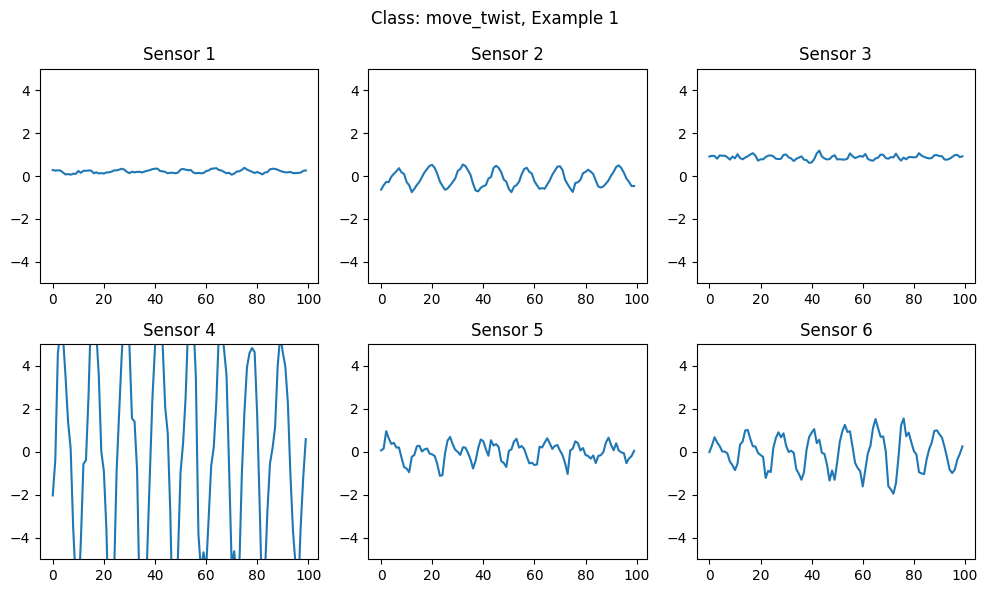

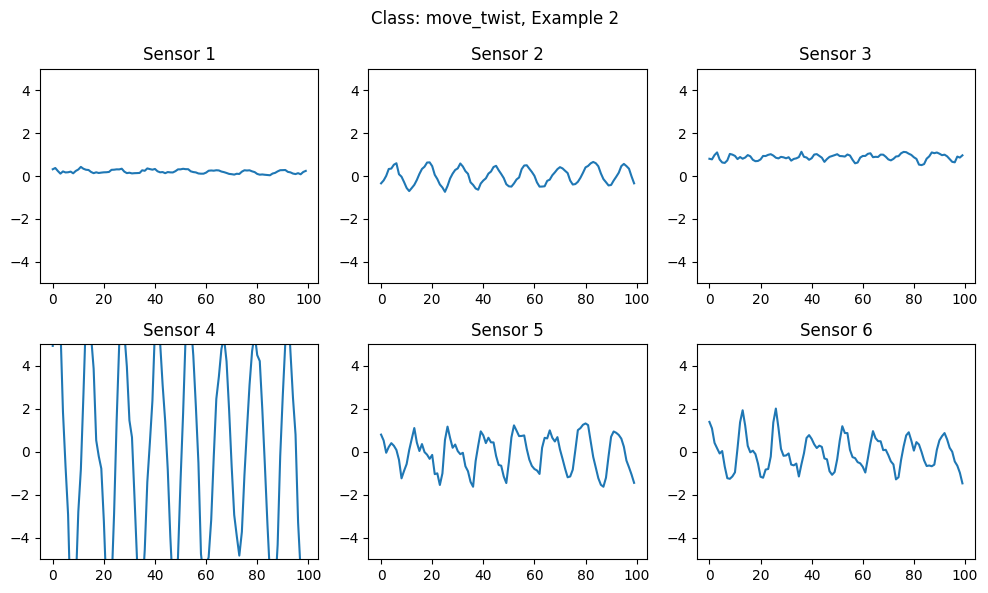

In [37]:
# STEP 9: Plot IMU data examples for each class
import matplotlib.pyplot as plt

num_examples_per_class = 2  # You can increase this if you want
y_min = -5
y_max = 5

label_map_inv = {0: "move_none", 1: "move_circle", 2: "move_shake", 3: "move_twist"}

for label in range(4):
    class_files = [f for f in os.listdir(f"motion_data/{label_map_inv[label]}") if f.endswith(".npy")]
    for i in range(min(num_examples_per_class, len(class_files))):
        file_path = f"motion_data/{label_map_inv[label]}/{class_files[i]}"
        sample = np.load(file_path)

        plt.figure(figsize=(10, 6))
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.plot(sample[:, j])
            plt.ylim(y_min, y_max)
            plt.title(f"Sensor {j+1}")
        plt.suptitle(f"Class: {label_map_inv[label]}, Example {i+1}")
        plt.tight_layout()
        plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


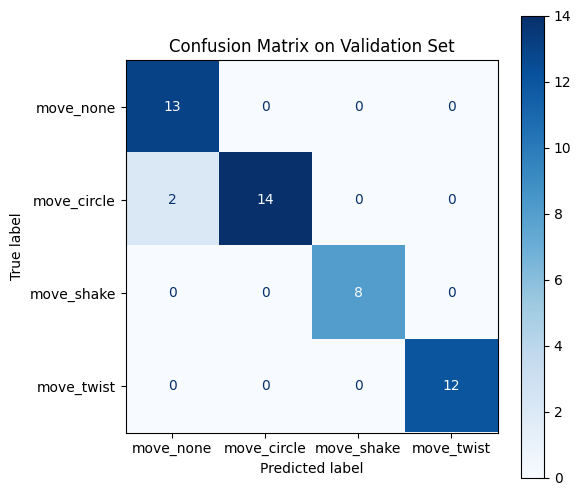

In [10]:
# STEP 10: Confusion Matrix Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict on the validation set
y_pred_probs = model.predict(X_val)  # shape (num_samples, 4)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Define class names
labels = ["move_none", "move_circle", "move_shake", "move_twist"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.title("Confusion Matrix on Validation Set")
plt.grid(False)
plt.show()

In [ ]:
fig.savefig("confusion_matrix.png", dpi=300)